# Pasos previs
Primer s'han d'instal·lar els paquets de Python necessaris. Es necessari instal·lar la llibreria __oracledb__ per la connexio a oracle i la __sshtunnel__ per fer el tunel. A l'assignatura hem preparat el paquet __GABDConnect__ que instal·la aquestes dues dependències i us facilitarà la connexió a al infraestructura de càlcul. També s'ha d'instal·lar el paquet __ucimlrepo__ per la importació de les dades de la UCI. A més, a la secció de "Secrets" del Colab, haureu d'afegir les variables de les dades de connexió al servidor d'Oracle i del tunel de SSH privades del vostre grup per que pugueu obrir les connexions.

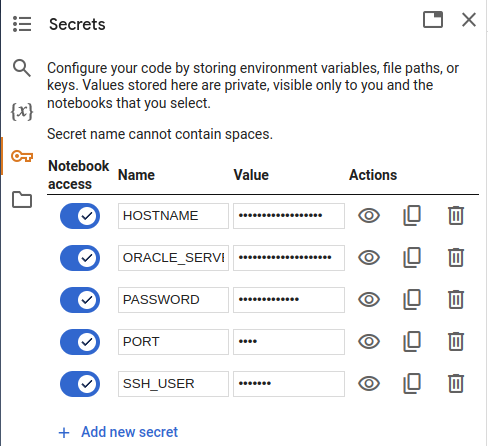

In [1]:
# @title Install or Update GABDConnect Libraries

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Function to install required packages
def install_packages(b):
    """
    Function to install or update necessary Python packages.

    Parameters:
    - b: Button object. Click event handler.
    """
    clear_output(wait=True)
    !pip install --upgrade pip -q  # Upgrade pip silently
    !pip install  git+https://github.com/Oriolrt/GABDConnect ucimlrepo -q  # Install or upgrade GABDConnect silently
    !pip install html2text -q  # Install or upgrade html2text silently
    print("Libraries have been downloaded or updated.")


install_packages(True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Libraries have been downloaded or updated.


In [2]:
# @title  Fem els imports de les llibreries
from GABDConnect.oracleConnection import oracleConnection as orcl
import getpass
import logging
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score
from datetime import datetime
import socket
from itertools import product
from ucimlrepo import fetch_ucirepo


# Connexió a Oracle
Inicialitzem les variables amb els valors guardats a la secció de "Secrets" com hem explicat a l'inici. La varia DSN contés les dades del __servidor__,__port__ i __nom del servei__ necesaris per fer la connexió a Oracle.


In [ ]:
import os

from google.colab import userdata

# Inicialitzem el diccionari amb les dades de connexió SSH per fer el tunel
SSH_USER = userdata.get('SSH_USER')
SSH_TUNNEL = userdata.get('HOSTNAME')

PORT = userdata.get('PORT')
PWD = userdata.get('PASSWORD')
hostname=userdata.get('ORACLE_SERVER')


# Dades per fer el tunel SSH
ssh_server = {'ssh': SSH_TUNNEL , 'user': SSH_USER,
                'pwd': PWD, 'port': PORT} if SSH_TUNNEL is not None else None

# Dades de connexió a Oracle
user = "testUCI"  # @param {type:"string"}   Segons s'indica a l'enunciat de la pràctica
oracle_pwd = "test_password"  # @param {type:"string"}  Poseu aqui la contrasenya que hagueu assignat a l'usuari gestorUCI
serviceName="FREEPDB1" # @param {type:"string"}

# Exercici: Carrega de Dades
Haureu d'implementar la funció _loadDataset_, la qual rebrà el nom del dataset del repositori de la [UCI](https://archive.ics.uci.edu/) i **db** una connexió oberta a la vostra base de dades d'Oracle i haura de retornar **Xo** i **yo** com en el codi d'exemple. Haureu de substituir aquest codi per la corresponent instrucció de SQL a través de la instrucció _execute_.

També haureu d'implementar la funció _saveExperiments_. En aquest cas haureu de cridar a una funció _insertExperiment_ en PL/SQL de l'usuari **GestorUCI** que rebi els paràmetres que podeu veure més avall. Dins de la funció _insertExperiment_ haureu de inserir (o actualitzar) els valors que estaran distribuïts per les diferents taules del vostre esquema. Feu un ús raonable de funcions/procediments que us ajudin a modular correctament el codi i fer anar també les excepcions d'Oracle per controlar la violació de les restriccions de clau primària i/o claus forànies quan inseriu més d'una repetició.

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import json

def loadDataset(db,nameDataset: str ) -> tuple():

  #TODO:
  # Fes la consulta que toca i processa el resultat per retornar les matrius
  # numpy Xo, yo

  try:
    # Crear un cursor
    cursor = db.cursor()
    # Executar una consulta
    res = cursor.execute("SELECT * FROM dual") #No poner nombre de esquema de gestor gestorUci.objeto NO

    # TODO:
    # un cop hagueu comprovat que la consulta retorna el que ha de retornar comenteu
    # el següent codi
    for row in res:
      print(res)

    cursor.close()
  except Exception as e:
    print(e)
    dataset = fetch_ucirepo(name=nameDataset)
    Xo = dataset.data.features.to_numpy()
    labels = dataset.data.targets.to_numpy().reshape(-1)
    lut = {l: e for e, l in enumerate(np.unique(labels))}
    yo = np.array([lut[l] for l in labels])




  return Xo, yo


def saveExperiments(db,classificador : str = "Support Vector Machines" ,
                      iteracio: int= 0 ,
                      parametres_classificador: dict() = {'kernel': "linear",  'gamma': 1},
                      data_experiment: str ="",
                      f1_score : float = 0,
                      accuracy : float = 0) -> bool:

  # TODO:
  # Heu d'implementar la funció PL/SQL insertExperiment (o com la vulgueu anomenar)
  # Aquesta funció està en l'esquema de l'usuari GestorUCI i ha de ser visible i accessible
  # des de l'usuari testUCI que ha d'executar aquest script.
  try:
    # Crear un cursor
    cursor = db.cursor()

    # Cridar la funció PL/SQL
    resultat = cursor.callfunc("insertExperiment", bool, [classificador, iteracio,
                                                          parametres_classificador,
                                                          data_experiment,
                                                          f1_score, accuracy])

    # Tancar el cursor i la connexió
    cursor.close()
    return resultat
  except Exception as e:
    print(e)

  return False


# Experiment amb datasets de la UCI

Les següents cel·les de codi s'encarreguen d'executar el cos principal (__main__) de codi. Essencialment no haureu de fer res excepte si voleu canviar el conjunt de dades de la UCI a processar:

```
["Iris", "Breast Cancer Wisconsin (Original)", "Ionosphere", "Letter Recognition"]
```

Si voleu inserir altres conjunt de dades, o inserir-ne menys mentre feu proves, haureu de canviar aquesta llista.


In [ ]:
# Cridem el constructor i obrim la connexió
db = orcl(user=user, passwd=oracle_pwd, hostname=hostname, ssh=ssh_server,serviceName=serviceName)

try:
  if not db.isStarted:
    db.open()
except Exception as e:
  print(e)


ORA-01017: invalid credential or not authorized; logon denied
Help: https://docs.oracle.com/error-help/db/ora-01017/


In [ ]:
from collections import namedtuple
numIterations = 2 #@param {type:"number"}
Algorithms = {
    'Support Vector Machines': SVC,
    'K nearest Neighbor': KNN,
    'Random Forest': RFC
}
params = { 'SVC' : {'kernel': ("linear", "rbf", "poly"),
                    'gamma': [1, 5, 10, 20]},
            'KNeighborsClassifier' : { 'n_neighbors' : [3, 5, 10, 15]},
            'RandomForestClassifier' : {'max_depth': [2, 4, 10, None],
                    'criterion': ['gini', 'entropy', 'log_loss']}
            }

DATASETS = {"Iris":"Iris", "BreastCancer":"Breast Cancer Wisconsin (Diagnostic)",
            "Ionosphere":"Ionosphere", "Letter":"Letter Recognition"}


name = "Iris" #@param ["Iris", "BreastCancer", "Ionosphere", "Letter"] {type:"string"}
nameDataset = DATASETS[name]

Xo,yo=loadDataset(db,nameDataset)


n_sample = len(Xo)

np.random.seed(0)

current_time = datetime.now().strftime("%d/%m/%Y, %H:%M")

for k in Algorithms:
    classificador = Algorithms[k].__name__
    c_params = params[classificador].keys()
    for idx,values in enumerate(product(*params[classificador].values())):
        cp = {k: v for k, v in zip(c_params, values) if v is not None}
        clf = Algorithms[k](**cp)
        for i in range(numIterations):
            order = np.random.permutation(n_sample)
            X = Xo[order]
            y = yo[order].astype(float)

            X_train = X[: int(0.9 * n_sample)]
            y_train = y[: int(0.9 * n_sample)]
            X_test = X[int(0.9 * n_sample) :]
            y_test = y[int(0.9 * n_sample) :]


            # Si no executem el script a la màquina main de la pràctica visualitzem els resultats

            # fit the model
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)

            f1_s = f1_score(y_test, y_pred, average='macro')
            acc = accuracy_score(y_test, y_pred)

            fet = saveExperiments(db,classificador=k, iteracio=i,
                                  parametres_classificador=cp,
                                  data_experiment = current_time,
                                  f1_score=f1_s,
                                  accuracy = acc)
            if not fet:
              print(
                "Classificador: {}, Iteracio: {}, paràmetres: {}, time: {}, f-score: {}, accuracy: {}".format(k, i, cp, current_time, f1_s,
                                                                                            acc))

'NoneType' object has no attribute 'callproc'
'NoneType' object has no attribute 'callproc'
Classificador: Support Vector Machines, Iteracio: 0, paràmetres: {'kernel': 'linear', 'gamma': 1}, time: 14/11/2024, 21:17, f-score: 0.9326599326599326, accuracy: 0.9333333333333333
'NoneType' object has no attribute 'callproc'
Classificador: Support Vector Machines, Iteracio: 1, paràmetres: {'kernel': 'linear', 'gamma': 1}, time: 14/11/2024, 21:17, f-score: 0.9373219373219372, accuracy: 0.9333333333333333
'NoneType' object has no attribute 'callproc'
Classificador: Support Vector Machines, Iteracio: 0, paràmetres: {'kernel': 'linear', 'gamma': 5}, time: 14/11/2024, 21:17, f-score: 1.0, accuracy: 1.0
'NoneType' object has no attribute 'callproc'
Classificador: Support Vector Machines, Iteracio: 1, paràmetres: {'kernel': 'linear', 'gamma': 5}, time: 14/11/2024, 21:17, f-score: 1.0, accuracy: 1.0
'NoneType' object has no attribute 'callproc'
Classificador: Support Vector Machines, Iteracio: 0, par

In [ ]:
if  db.isStarted:
  db.close()

i no us oblideu de tancar la connexió.

